# Mammogram Mass Severity

1. Build Statistical Classification model to detect severity 
2. Create evaluation metric for your model 
3. Determine whether the data is normally distributed visually and statistically 4. Detect outliers in the dataset 
5. Impute missing values 
6. What is the distribution of target with respect to categorical columns 7. Perform EDA on data on age column


This data contains the following attributes:

    BI-RADS assessment: 1 to 5 (ordinal)
    Age: patient's age in years (integer)
    Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
    Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
    Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
    Severity: benign=0 or malignant=1 (binominal)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
col_=['BI_RADS', 'age', 'shape', 'margin', 'density','severity']
df=pd.read_csv("C:\My Data\Files\Interview Preparation\Globant\mammographic_masses.data", na_values='?', names=col_, usecols=range(1,6))
df.head(5)

,age,shape,margin,density,severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [3]:
df.describe(include=("all"))

,age,shape,margin,density,severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


Check null values and if present impute them with mode

In [4]:
df.isnull().sum()

age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

# 5. Impution

In [5]:
# 5. Imputing each column with its most common value
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.describe(include=("all"))

,age,shape,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000
mean,55.505723,2.762747,2.706556,2.917794,0.463059
std,14.444586,1.243276,1.576272,0.365869,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
# Recheck the missing values
df.isnull().sum()

age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

Plotting the categorical values with bar plot

In [7]:
df.head()

,age,shape,margin,density,severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,3.0,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,3.0,1


# Performing basic check on data for count values

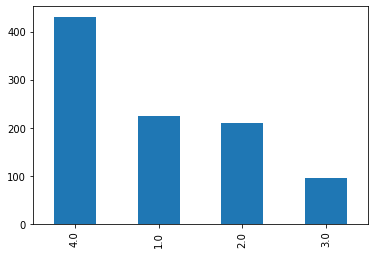

In [8]:
df['shape'].value_counts().plot(kind='bar')

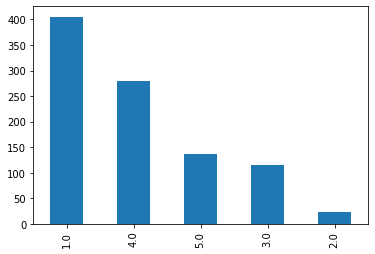

In [9]:
df['margin'].value_counts().plot(kind='bar')

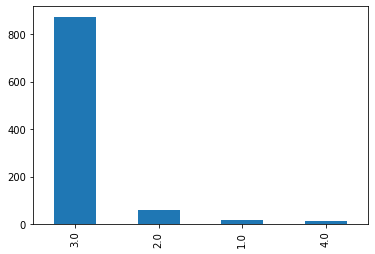

In [10]:
df['density'].value_counts().plot(kind='bar')

Above plot shows that density has very high values of 3. This makes the dataset imbalanced.


# 4. Data does not have outliers in it.

The values contain by categorical features are in their specified range and for continuous feature also, they are in less than 1.5 times IQR

# 3. Check for whether the data is normally distributed 

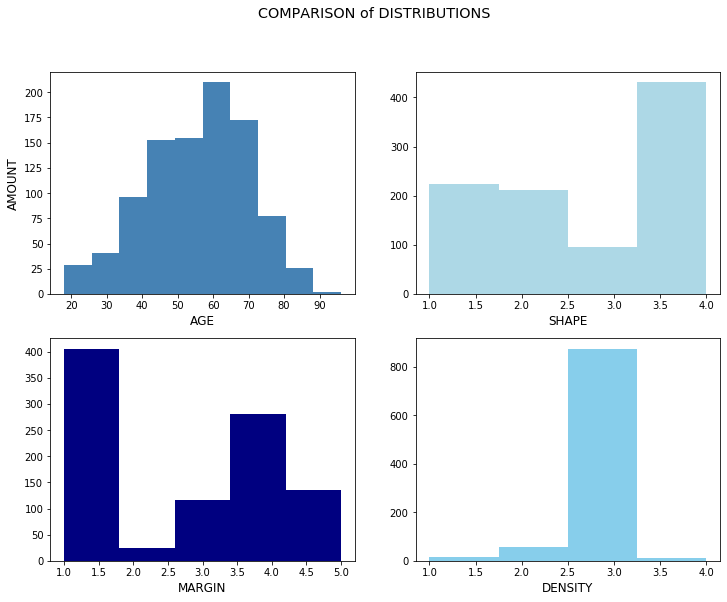

In [11]:

fig, axes = plt.subplots(2,2, sharey=False, figsize=(12,9))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.hist(df['age'], bins=10, color="steelblue")
ax2.hist(df['shape'], bins=4, color="lightblue")
ax3.hist(df['margin'], bins=5, color="navy")
ax4.hist(df['density'], bins=4, color="skyblue")
ax1.set_xlabel('AGE', fontsize="large")
ax2.set_xlabel('SHAPE', fontsize="large")
ax3.set_xlabel('MARGIN', fontsize="large")
ax4.set_xlabel('DENSITY', fontsize="large")
ax1.set_ylabel("AMOUNT", fontsize="large")

plt.suptitle('COMPARISON of DISTRIBUTIONS', ha='center', fontsize='x-large')
plt.show()

# 6. The relationship between independent variables and target variable


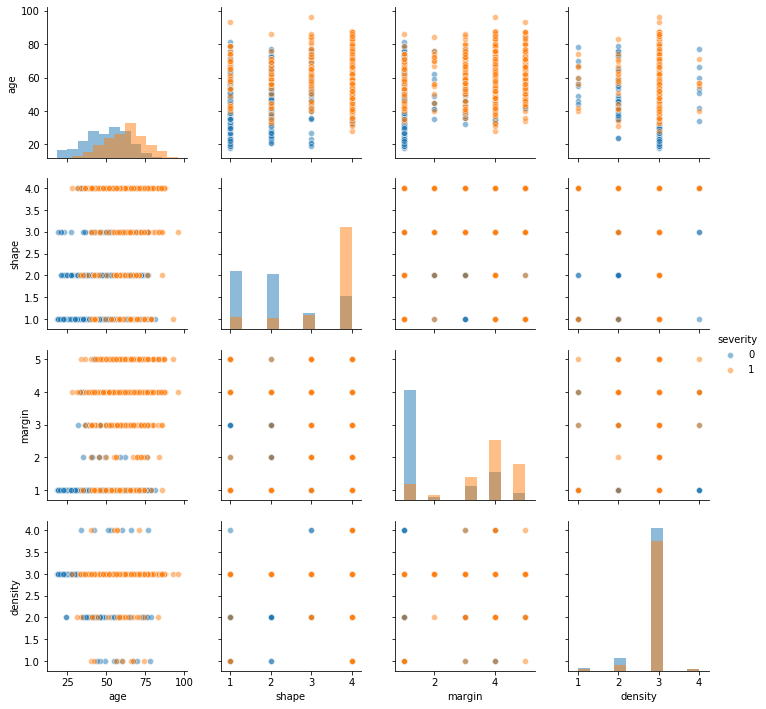

In [12]:

g= sns.pairplot(df,hue = 'severity', diag_kind= 'hist',
             vars=df.columns[:-1],
             plot_kws=dict(alpha=0.5), 
             diag_kws=dict(alpha=0.5))
plt.show()

In [13]:
feature_names=['age', 'shape', 'margin', 'density']
features=df[['age', 'shape', 'margin', 'density']].values
classes=df['severity'].values

## Normalizing the data

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
print("Scaled features:")
features_scaled

Scaled features:


array([[ 0.79616418,  0.19092812,  1.45573748,  0.22480407],
       [-0.86622317, -1.41856247, -1.08321663,  0.22480407],
       [ 0.17276892,  0.99567342,  1.45573748,  0.22480407],
       ...,
       [ 0.58836576,  0.99567342,  1.45573748,  0.22480407],
       [ 0.72689804,  0.99567342,  1.45573748,  0.22480407],
       [ 0.44983348,  0.19092812,  0.18626042,  0.22480407]])

In [15]:
# Splitting the data into training data and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(features_scaled, classes, test_size=0.2, random_state=0)

# 1. Model selection and training

We will try with nultiple models and analyse their performance.

In [16]:
# SVM Classifier
# Logistic Regression
# KNN
# Random Forest
# Decision Tree 

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_dict={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knn',
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0):'rfc',
    DecisionTreeClassifier(random_state=0):'dtc'}
for model in model_dict:
    model.fit(X_train, y_train)
    pred_c=model.predict(X_test)
    accc=accuracy_score(y_test, pred_c)
    print("Accuracy score: ", model_dict[model], " - ", accc.round(2))

Accuracy score:  svc  -  0.66
Accuracy score:  lr  -  0.8
Accuracy score:  knn  -  0.76
Accuracy score:  rfc  -  0.79
Accuracy score:  dtc  -  0.72


### Clearly logistic regression gave better accuracy. 

Lets test this with K-fold cross validation because it gives better results. he mean of these K scores is consider as the ultimate accuracy score for the model.

In [17]:
from sklearn.model_selection import cross_val_score
for model in model_dict:
    score=cross_val_score(model,features_scaled,classes, cv=10)
    print("Accuracy score for model - ", model_dict[model], "with cross validation is ",'{:3.2f}'.format(score.mean()))

Accuracy score for model -  svc with cross validation is  0.71
Accuracy score for model -  lr with cross validation is  0.79
Accuracy score for model -  knn with cross validation is  0.78
Accuracy score for model -  rfc with cross validation is  0.80
Accuracy score for model -  dtc with cross validation is  0.73


# 2. Evaluation metric the model

We use model evaluation metric like confusion matrix, precision, recall, F1 score, and AUR-ROC curve. We will analyse the performance of each model one by one.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model_dict={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knn',
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0):'rfc',
    DecisionTreeClassifier(random_state=0):'dtc'}
for model in model_dict:
    model.fit(X_train, y_train)
    pred_c=model.predict(X_test)
    accc=accuracy_score(y_test, pred_c)
    print("Accuracy score: ", model_dict[model], " - ", accc.round(2))
    print ("The confusion Matrix for model:{} \n\n".format(model_dict[model]))
    print (confusion_matrix(y_test, pred_c), '\n')
    print (classification_report(y_test, pred_c))

Accuracy score:  svc  -  0.66
The confusion Matrix for model:svc 


[[86 14]
 [51 42]] 

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       100
           1       0.75      0.45      0.56        93

    accuracy                           0.66       193
   macro avg       0.69      0.66      0.64       193
weighted avg       0.69      0.66      0.65       193

Accuracy score:  lr  -  0.8
The confusion Matrix for model:lr 


[[80 20]
 [19 74]] 

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.79      0.80      0.79        93

    accuracy                           0.80       193
   macro avg       0.80      0.80      0.80       193
weighted avg       0.80      0.80      0.80       193

Accuracy score:  knn  -  0.76
The confusion Matrix for model:knn 


[[80 20]
 [26 67]] 

              precision    recall  f1-score   support

           0       0.75    

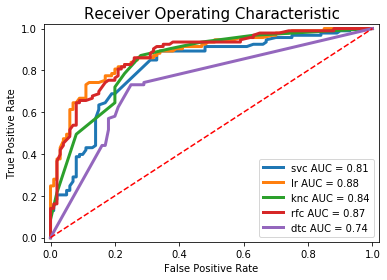

In [19]:
from sklearn.metrics import roc_curve, auc
model_dict={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knc',
    RandomForestClassifier(max_depth=3, n_estimators=100):'rfc',
    DecisionTreeClassifier():'dtc'}
for model in model_dict:
    model.fit(X_train,y_train)
    prob=model.predict_proba(X_test)
    fpr, tpr, thresholds=roc_curve(y_test, prob[:,1])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=model_dict[model]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic', fontsize=15)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams["figure.figsize"] = (17,12)
plt.show()